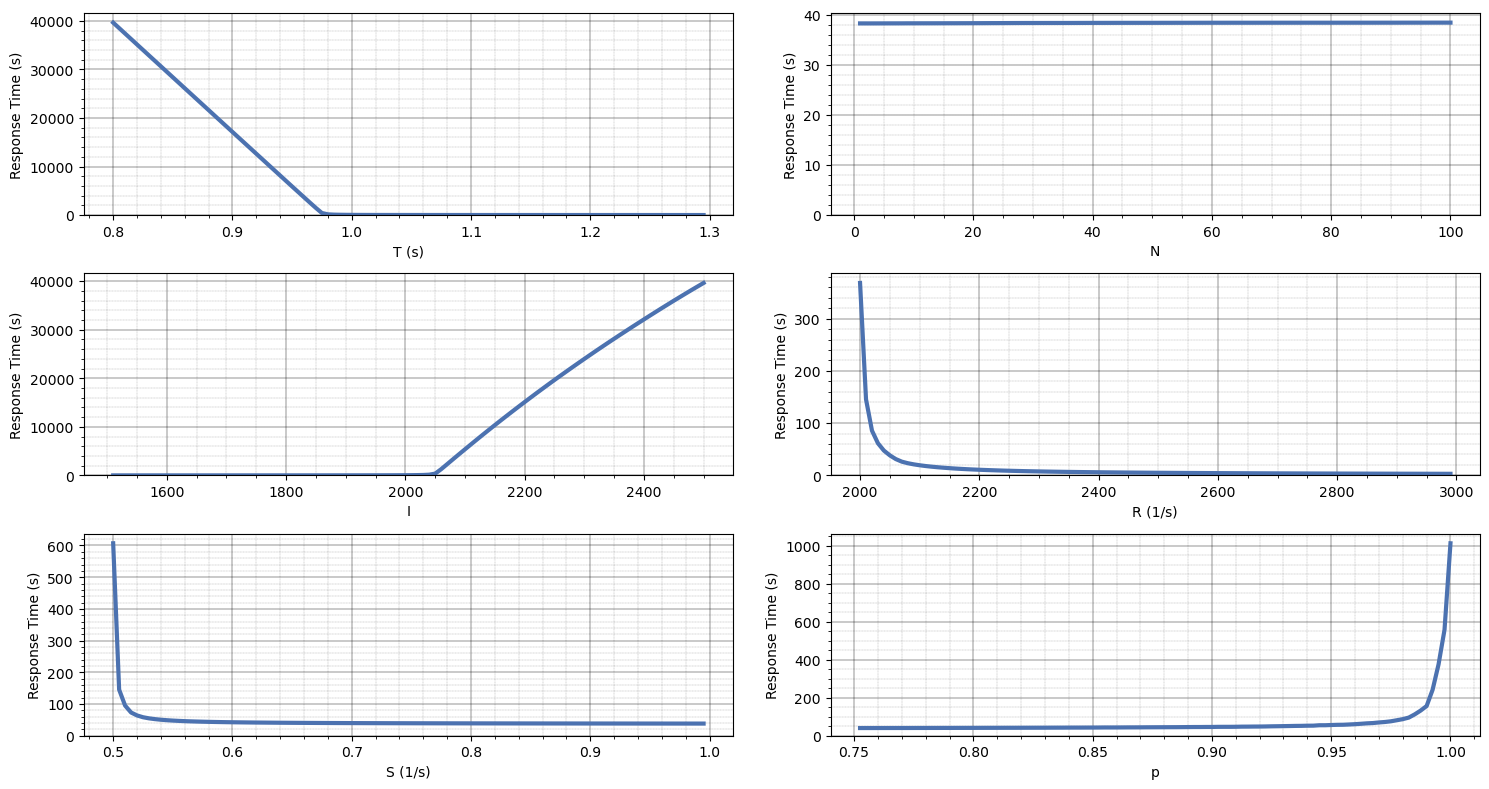

In [6]:
import sys
import json
import matplotlib.pyplot as plt

stat = "taskTimeStat:mean"
json_file = "../simulations/results/stability_segregation.json"
#json_file = "../simulations/results/stability_fairsharing.json"
#json_file = "../simulations/results/continuity.json"
json_file = "../simulations/results/testRucola_false.json"
json_file = "../simulations/results/testRucola_true.json"

parameter_names = ['T (s)', 'N', 'I', 'R (1/s)', 'S (1/s)', 'p']

#x_functions = [lambda x: x/200+0.795, lambda x: x, lambda x: x*10+1500, lambda x: x*10+1990, lambda x: x/200+0.495, lambda x: x/400+0.75]

x_functions = [lambda x: x/200+0.795, lambda x: x, lambda x: x*10+1500, lambda x: x*10+1990, lambda x: x/200+0.495, lambda x: x/400+0.75]

with open(json_file) as f:
    data = json.load(f)

result = {}

for test in data:
    sim = data[test]
    #print(sim['itervars'])
    sliding_parameter = int(sim['itervars']['v'])
    x = int(sim['itervars']['r'])

    #if x < 20 or x > 80:
    #    continue

    for scalar in sim['scalars']:
        if scalar['name'] == stat: # 'cloudNodeStatNq:timeavg':#'taskTimeStat:mean':
            y = scalar['value']
            if not sliding_parameter in result:
                result[sliding_parameter] = {}
            result[sliding_parameter][x] = y
            break

for sliding_parameter in result:
    # sort result[sliding_parameter] by x
    result[sliding_parameter] = dict(sorted(result[sliding_parameter].items()))

#plot



# plot each sliding parameter in a different plot (but in the same figure)
# plor 3 x 2

# add spacing between plots

fig, ax = plt.subplots(3, 2, figsize=(15, 8))
# add spacing between plots horizontally
for sliding_parameter in result:
    x = list(result[sliding_parameter].keys())
    y = list(result[sliding_parameter].values())
    x = [x_functions[sliding_parameter-1](i) for i in x]
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].plot(x, y, color="#4c72b0", linewidth=3)
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].set_xlabel(parameter_names[sliding_parameter-1])
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].set_ylabel('Response Time (s)')
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].grid()
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].set_ylim(bottom=0)
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].set_ylim(top=max(y)*1.05)
#    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].set_xlim(left=0)

    # add minor ticks
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].minorticks_on()

    # add minor ticks grid
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].grid(which='minor', linestyle=':', linewidth='0.2', color='black')
    ax[(sliding_parameter-1)//2, (sliding_parameter-1)%2].grid(which='major', linestyle='-', linewidth='0.3', color='black')

plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(wspace=0.15)

#plt.savefig("stability_fairshare.pdf", format='pdf')
#plt.savefig("continuity_segregation.pdf", format='pdf')
plt.show()

